# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

- Abrir los datos en un software compatible con CSV, ene ste caso se usó Visual Studio Code, se observó que todos los archivos tenían como separador el símbolo ";"

### Importación de librerías

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

### Obtener los dataframes

In [2]:
# leer conjuntos de datos en los DataFrames
df_inst = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_prod = pd.read_csv('/datasets/products.csv', sep=';')
df_ais = pd.read_csv('/datasets/aisles.csv', sep=';')
df_dep = pd.read_csv('/datasets/departments.csv', sep=';')
df_ord = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
df_inst.info()
print(df_inst.shape)
df_inst.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
(478967, 6)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


### Mostrar información de los dataframes

In [4]:
# mostrar información del DataFrame
df_prod.info()
print(df_prod.shape)
df_prod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
(49694, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
df_ord.info(show_counts=True)
print(df_ord.shape)
df_ord.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
(4545007, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [6]:
# mostrar información del DataFrame
df_ais.info()
print(df_ais.shape)
df_ais.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
# mostrar información del DataFrame
df_dep.info()
print(df_dep.shape)
df_dep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

- En los 5 DataFrames los separadores fueron ';' de los csv's de origen
- Una vez cargados se utilizó el método info junto con el método shape como comprobación del tamaño
- Existen valores ausentes en unos DatFrames, peculiarmente en el DataFrame de 'order_products' por la gran canitdad de datos que tiene no se contabilizaron los valores no nulos, por lo cual se le asignó en parámetro 'show_counts=True'
- Aparentemente de primera impresión todos los tipos de datos por columna no hay incoherencia considerable para la ingeniería de caractrísticas o bien es compatible y posible convertir tipos de datos.
- Para una mejor visión se usó el apoyo del método head()


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

### Crear funciones de apoyo

In [8]:
#FUNCIONES PARA PRE PROCESMIENTO DE DATOS

#Verificar capacidad de conversión
def conversion_dato(DataFrame, ColumList, Type):
    #Parámetro Type 1 Entero 2 Categóricos, Object, String 3 Flotante
    #Con esta función verifica si tiene el formato correcto del que se especifique para las columnas especificada
    #Retorna True si esta cumple en su totalidad (formato correcto y sin valores ausentes)
    if Type == 1:
        Type_Name = "Entero"
    elif Type == 2:
        Type_Name = "Cadena"
    else:
        Type_Name = "Flotante"
        
    dir_result={'Conversion':Type_Name}
    for col in ColumList:
        if Type==1:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype(int))
            except:
                bool = False
            dir_result.update({col:bool})
        elif Type==2:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype("category"))
            except:
                bool = False
            dir_result.update({col:bool})
        elif Type==3:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype(float))
            except:
                bool = False
            dir_result.update({col:bool})
    return dir_result
        
#Valores ausentes
def columnas_ausentes(DataFrame):
    #Verifica la cantidad y la columnas que contienen valores ausentes de un DataFrame
    dir={}
    for col in DataFrame.columns.values:
        if DataFrame[col].isnull().sum() > 0:
            dir.update({col:int(DataFrame[col].isnull().sum())})
    return dir

#Tipo de datos columa
def tipo_dato_columnas(DataFrame,Columna):
    #Retorna el tipo de dato que es compatible todos los dtos de una columna sin contar valores nulos
    #Esta función no elimina datos nulos del dataframe de entrada
    list=[]
    df = DataFrame[Columna].dropna()
    try:
        d_int = np.array_equal(df,df.astype(int))
    except:
        d_int = False
    if d_int:
        list.append('Int')
        
    try:
        d_str = np.array_equal(df,df.astype("category"))
    except:
        d_str = False
    if d_str:
        list.append('Str')

    try:
        d_flt = np.array_equal(df,df.astype(float))
    except:
        d_flt = False
    if d_flt:
        list.append('Float')
    
    return {Columna:list}

### Corrección de tipos de datos

In [9]:
#Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
df_inst.info()
print()
#Verificar los tipos id que los datos son compatibles con enteros
print(tipo_dato_columnas(df_inst,'order_id'))
print(tipo_dato_columnas(df_inst,'user_id'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

{'order_id': ['Int', 'Str', 'Float']}
{'user_id': ['Int', 'Str', 'Float']}


In [10]:
df_prod.info()
#Verificar los tipos id que los datos son compatibles con enteros
print()
print(tipo_dato_columnas(df_prod,'product_id'))
print(tipo_dato_columnas(df_prod,'aisle_id'))
print(tipo_dato_columnas(df_prod,'department_id'))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

{'product_id': ['Int', 'Str', 'Float']}
{'aisle_id': ['Int', 'Str', 'Float']}
{'department_id': ['Int', 'Str', 'Float']}



In [11]:
df_ord.info(show_counts=True)
#Verificar los tipos id que los datos son compatibles con enteros
print()
print(tipo_dato_columnas(df_ord,'order_id'))
print(tipo_dato_columnas(df_ord,'product_id'))
print(tipo_dato_columnas(df_ord,'add_to_cart_order'))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

{'order_id': ['Int', 'Str', 'Float']}
{'product_id': ['Int', 'Str', 'Float']}
{'add_to_cart_order': ['Int', 'Str', 'Float']}



In [12]:
df_ais.info()
print()
#Verificar los tipos id que los datos son compatibles con enteros
print(tipo_dato_columnas(df_ais,'aisle_id'))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

{'aisle_id': ['Int', 'Str', 'Float']}



In [13]:
df_dep.info()
print()
#Verificar los tipos id que los datos son compatibles con enteros
print(tipo_dato_columnas(df_dep,'department_id'))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

{'department_id': ['Int', 'Str', 'Float']}



## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

- Revisar mediante el método info, la cantidad de valores nulos de las columnas id y el tipo de dato reconocido como Int
- Con nuestra función verificar si efectivamente todos los datos son enteros.
- Eliminar todas las filas duplicadas que exactamente sean filas identicas (Pide realizarlo en el paso 5).
- Filtrar y eliminar datos repetidos implicitos en tipo Object

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [14]:
#Revisa si hay pedidos duplicados
print(df_inst.duplicated().sum())

15


- Existen 15 pedidos duplicados

In [15]:
print(df_inst[df_inst.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [16]:
print(df_inst.isnull().count())

order_id                  478967
user_id                   478967
order_number              478967
order_dow                 478967
order_hour_of_day         478967
days_since_prior_order    478967
dtype: int64


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? Todos tienen en común el día y la hora

In [17]:
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_inst_q1 = df_inst.query('order_hour_of_day==2 & order_dow==3')
#Mostrar todos los datos
pd.set_option('max_rows',len(df_inst_q1))
#Ordenar por id para visualizar los duplicados
print(df_inst_q1.sort_values(by='order_id'))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
452265       191   176417            44          3                  2   
468324    222962    54979            59          3                  2   
247867    238782   196224             6          3                  2   
417106    248760   204961            25          3                  2   
328565    264348    34806             6          3                  2   
316583    272079   121263             7          3                  2   
210068    284770   137352             7          3                  2   
359625    332561   201301             1          3                  2   
195093    350018   142887             6          3                  2   
29129     353088    46038             4          3                  2   
18420     382357   120200            19          3                  2   
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3 

¿Qué sugiere este resultado?
Que en ese periodo de tiempo es donde existen datos duplicados

In [18]:
# Elimina los pedidos duplicados
df_inst.drop_duplicates(inplace=True)

In [19]:
# Vuelve a verificar si hay filas duplicadas
print(df_inst.duplicated().sum())

0


In [20]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print('Total de ids únicos:',len(df_inst['order_id'].unique()))
print('Total de registros:',len(df_inst))

Total de ids únicos: 478952
Total de registros: 478952


Describe brevemente tus hallazgos y lo que hiciste con ellos
- Al verificar que fueran datos dulicados en filas absolutamente todos los datos se procedió a eliminarlos, podemos ver que coincide en un periodo los datos que se duplicaron, se verifican los pedidos por fila completa ya que por columna es posible que existan duplicados ya que varios productos, fechas etc pueden coincidir por lo tanto no se considera duplicado en este estudio

### `products` data frame

In [21]:
# Verifica si hay filas totalmente duplicadas
print(df_prod.duplicated().sum())

0


In [22]:
# Revisa únicamente si hay ID de departamentos duplicados
print('Total de ids únicos:',len(df_prod['department_id'].unique()))
print('Total de registros:',len(df_prod))

Total de ids únicos: 21
Total de registros: 49694


- El 'id' se repite pero es permitido ya que la relación es de 1 a * (muchos)

In [23]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(df_prod['product_name'].str.upper().is_unique)

False


- Existen nombres duplicados pero es permitido

In [24]:
# Revisa si hay nombres duplicados de productos no faltantes
df_prod['aisle_id'].unique()

array([ 61, 104,  94,  38,   5,  11,  98, 116, 120, 115,  31, 119,  74,
        56, 103,  35,  79,  63,  40,  20,  49,  47,   3,  41, 127, 121,
        81, 123, 107, 131, 106,  69, 100,  64,  78,  83,  58,  66,  87,
        14, 105,  22, 134,  23, 111, 128,  50,   9,  96,  92,  89,  88,
       130,  26,  77,  65,  12,  95,  19,   7,   6,  97,   2, 112,  10,
        51,  13,  75,  70,  93,  34,  62,  21,  29,  45, 118,   4, 108,
        37, 109,  91,  24,  67, 132,  25, 129,  46,  16,  52,  17,  73,
       122,  42,  59, 126,  33,   1,   8,  82, 114, 124, 117,  72, 110,
        85,  44,  80, 101,  84,  30,  27,  90,  48, 133,  53,  28,  68,
        43, 125,  57,  15,  55,  36,  54, 102,  60,  99,  18,  39,  71,
       113,  86,  32,  76])

In [25]:
#TODOS LOS PRODUCTOS TIENEN ASIGNADO UN PASILLO

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Verificamos donde existinan datos duplicados en columans epecifícas, se concluye que son posibles tener duplicados debido al paradignma entidad relación uno a muchos

### `departments` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
print(df_dep.duplicated().sum())

0


- No existen filas duplicadas

In [27]:
# Revisa únicamente si hay IDs duplicadas de productos <--(POSIBLEMENTE SE REFIERAN A ID DE DEPARTAMENTOS)
print(df_dep['department_id'].is_unique)

True


- No existen ids de departamento duplicados

In [28]:
print(len(df_dep['department_id'].unique()))
print(df_dep['department_id'].count())

21
21


In [29]:
print(df_dep['department_id'])
#Realizamos otra comprobación y vemos que van consecutivos

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
Name: department_id, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Observamos que todos los datos están coherentes y sin duplicados, solo fue necesario comprobar

### `aisles` data frame

In [30]:
# Revisa si hay filas totalmente duplicadas
print(df_ais.duplicated().sum())

0


- No existen filas duplicadas

In [31]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_ais['aisle_id'].is_unique)
print(len(df_ais))
print(len(df_ais['aisle_id']))

True
134
134


- Mediante estos métodos verificamos que no existen ids de pasillo duplicados, así mismo comprobamos los existente con el número de registros

In [32]:
print(df_ais['aisle_id'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134]


- Mostramos los ids y vemos que van consecutivos

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- El id de pasillos es correcto, como es clave primaria debe ser única

### `order_products` data frame

In [33]:
# Revisa si hay filas totalmente duplicadas
print(df_ord.duplicated().sum())

0


In [34]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print('Total de registros')
print(len(df_ord))
print()
print(df_ord['order_id'].unique())
print(len(df_ord['order_id'].unique()))
print()
print(df_ord['product_id'].unique())
print(len(df_ord['product_id'].unique()))
print()
print(df_ord['add_to_cart_order'].unique())
print(len(df_ord['add_to_cart_order'].unique()))
print()
print(df_ord['reordered'].unique())
print(len(df_ord['reordered'].unique()))

Total de registros
4545007

[2141543  567889 2261212 ...  812418 2666881 1461911]
450046

[11440  1560 26683 ... 49153  8182 40024]
45573

[17.  1. 35.  5.  4. 10. 14.  2. 28.  3. 16.  8.  7.  6.  9. 15. 22. 49.
 19. 13. 11. 12. 18. 24. 23. 45. 30. 31. 29. 21. 38. 20. 57. 58. 26. 25.
 39. 34. 40. 27. nan 43. 33. 42. 50. 32. 36. 37. 61. 46. 56. 41. 44. 55.
 54. 47. 63. 48. 60. 62. 53. 59. 52. 51. 64.]
65

[0 1]
2


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Al analizar la columa id podemos observar que existen duplicados en esa columna, con respeto a la lógica de la entidad relación es válido puesto que muchos productos pueden pertenecer a la misma orden, siendo una relación de muchos a muchos por lo cual es válido tener duplicados en esta tabala, asi mismo pudimos verificar que no exiten valores ausentes en la columna menciona.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [35]:
# Encuentra los valores ausentes en la columna 'product_name'
columnas_ausentes(df_prod)
#Utilizamos la función preiamente definida que retorna el número de datos ausente de todas las columnas que tienen

{'product_name': 1258}

Describe brevemente cuáles son tus hallazgos.
- Existen valores 1258 valores ausentes en la columna product_name 

In [36]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_prod_nan = df_prod[(df_prod['product_name'].isna())]
print(df_prod_nan)
print(df_prod_nan['aisle_id'].unique())


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
[100]


Describe brevemente cuáles son tus hallazgos.
- Comprobamos que la hipótesis es Aceptada, los nombres ausentes solo son aquellos que tienen el pasillo con id 100

In [37]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_prod_nan['department_id'].unique())

[21]


Describe brevemente cuáles son tus hallazgos.
- Comprobamos que la hipótesis es Aceptada, los nombres ausentes solo son aquellos que tienen el departamento con id 21

In [38]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_dep.query('department_id==21'))
print(df_ais.query('aisle_id==100'))

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.
- En ambos casos es un dato desconocido, aunque no está como nulo.

In [39]:
# Completa los nombres de productos ausentes con 'Unknown'
df_prod['product_name'].fillna('Unknown',inplace=True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Es recomendable colocar un valor descriptivo tipo categórico en los productos para no ser marcado como ausente y tener el mismo comportamiento con sus tablas relacionales.

### `orders` data frame

In [40]:
# Encuentra los valores ausentes
columnas_ausentes(df_inst)

{'days_since_prior_order': 28817}

In [41]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_inst.query('order_number>1').info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450135 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                450135 non-null  int64  
 1   user_id                 450135 non-null  int64  
 2   order_number            450135 non-null  int64  
 3   order_dow               450135 non-null  int64  
 4   order_hour_of_day       450135 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 24.0 MB
None


In [42]:
#Comprobamos los que han hecho únicamente su primer pedido
print(df_inst.query('order_number==1').info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28817 entries, 28 to 478945
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                28817 non-null  int64  
 1   user_id                 28817 non-null  int64  
 2   order_number            28817 non-null  int64  
 3   order_dow               28817 non-null  int64  
 4   order_hour_of_day       28817 non-null  int64  
 5   days_since_prior_order  0 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 1.5 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No existen valores ausentes depués del primer pedido del cliente
- Por lógica podemos ver que la columna days_since_prior_order está nulo cuando no ha trancurrido niungún día, lo ideal es cambiarla por 0, y agregar esta indicación en nuestro diccionario de datos (Valor 0 significa que apenas realizó su primera compra) podemos ocupar este criterio ya que trabajamos con esta base sólida y hemos comprobado anteriormente que todos los valores nulos son los que llevan 1 pedido únicamente


In [43]:
#Comprobamos y realizamos el calculo restando el total de registros - los que tienen solo un pedido = 28,817
#Lo cual es seguro omitir los datos ausentes por 0 y realizar la conversión
df_inst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [44]:
df_inst['days_since_prior_order'].fillna(0,inplace=True)

In [45]:
#Comprobamos la correcta conversión
conversion_dato(df_inst, ['days_since_prior_order'], 1)

{'Conversion': 'Entero', 'days_since_prior_order': True}

In [46]:
#Se realiza la conversión una vez comprobada
df_inst['days_since_prior_order'] = df_inst['days_since_prior_order'].astype(int)

### `order_products` data frame

In [47]:
# Encuentra los valores ausentes
columnas_ausentes(df_ord)

{'add_to_cart_order': 836}

In [48]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_ord['add_to_cart_order'].min())
print(df_ord['add_to_cart_order'].max())
print(sorted(df_ord['add_to_cart_order'].unique()))
print(len(df_ord['add_to_cart_order'].unique()))

1.0
64.0
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 53.0, 54.0, 55.0, 56.0, 58.0, nan, 50.0, 51.0, 52.0, 57.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0]
65


Describe brevemente cuáles son tus hallazgos.
- Al ordenar y contar los valores de la columna add_to_cart_order podemos ver que son datos enteros, lo cual es conveniente hacer una conversión a entera y a esta le correspondería el número 65

In [49]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
list_prod_id=df_ord[df_ord['add_to_cart_order'].isna()]['order_id'].unique()
#df_list_id_inst = df_inst.query('order_id in @df_list_id')['order_id'].unique()
print(list_prod_id)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [50]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_prod_aus = df_ord.query('order_id in @list_prod_id')

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print(df_prod_aus.groupby(by='order_id').count())

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(df_prod_aus.groupby(by='order_id').count().min())

#La hipotesís es correcta y aceptada

          product_id  add_to_cart_order  reordered
order_id                                          
9310              65                 64         65
61355            127                 64        127
102236            95                 64         95
129627            69                 64         69
165801            70                 64         70
171934           104                 64        104
180546            66                 64         66
264710            91                 64         91
293169            77                 64         77
388234            70                 64         70
404157            76                 64         76
678116            70                 64         70
733526            69                 64         69
747668            65                 64         65
813364            85                 64         85
844733            77                 64         77
854647            67                 64         67
871281            74           

Describe brevemente cuáles son tus hallazgos.
- La hipotesís es correcta y aceptada, por cada id diferente de producto en un producto diferente

In [51]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_ord['add_to_cart_order'].fillna(999,inplace=True)
#Aprovechamos la función para verificar que se pyuede convertir a entero (retorna true si no hay valores ausentes, es decir si es compatible toda la columna)
print()
print(conversion_dato(df_ord, ['add_to_cart_order'], 1))
#Convertimos la columna
print()
df_ord['add_to_cart_order'] = df_ord['add_to_cart_order'].astype(int)
#comprobamos la conversión
print()
df_ord.info()
print()
print(df_ord.head())


{'Conversion': 'Entero', 'add_to_cart_order': True}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Una vez no habiendo datos nulos se oprocedió a la conversión, es importante verificar la compatibilidad antes de realizarla, lo cual dará más calidad a los resultados, entender bien la entidad relación de nuestros datos.

In [52]:
df_inst.info()
print()
df_prod.info()
print()
df_ord.info(show_counts=True)
print()
df_ais.info()
print()
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 25.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

<class 'pandas.co

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

- El procesamiento de datos es de suma importancia, ya que da mas presición al tener los tipos de dato adecuados, sin valores nulos, calidad y un mejor trabajo para realizar nuestros análisis, utilizando funciones podemos agilizar nuestros trabajos futuros.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

In [53]:
print(df_inst['order_hour_of_day'].min())
print(df_inst['order_hour_of_day'].max())

print(df_inst.groupby('order_hour_of_day').count().reset_index(drop=True)['order_id'])

0
23
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


In [54]:
print(df_inst['order_dow'].min())
print(df_inst['order_dow'].max())
print(df_inst.groupby('order_dow').count().reset_index(drop=True)['order_id'])

0
6
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


Escribe aquí tus conclusiones
-  Los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders SON razonables

    order_hour_of_day  users_cant
0                   0        2991
1                   1        1671
2                   2         958
3                   3         744
4                   4         735
5                   5        1281
6                   6        3757
7                   7       10993
8                   8       20268
9                   9       28112
10                 10       32195
11                 11       32660
12                 12       31754
13                 13       32433
14                 14       32797
15                 15       32894
16                 16       31579
17                 17       26825
18                 18       21795
19                 19       17026
20                 20       12891
21                 21        9806
22                 22        7670
23                 23        5167


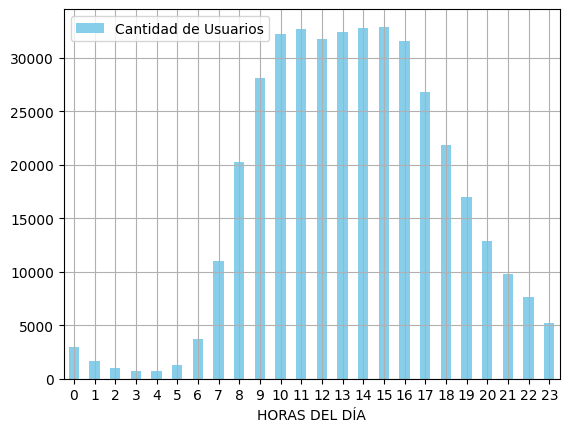

In [55]:
list=df_inst['order_hour_of_day'].unique()
list.sort()
list_values=[]
list_hours=[]
for val in list:
    users=df_inst.query('order_hour_of_day==@val')['user_id'].unique()
    list_values.append(len(users))
    list_hours.append(val)

data = {
    'order_hour_of_day': list_hours,
    'users_cant': list_values
    }

df_users_hours = pd.DataFrame(data)
print(df_users_hours)

df_users_hours.plot(kind='bar',
                    x='order_hour_of_day',
                    rot=0,
                    y='users_cant',
                    color='skyblue',
                    grid=True,
                    xlabel='HORAS DEL DÍA'
                   )
plt.legend().remove()
plt.legend(['Cantidad de Usuarios'])
plt.show()

Escribe aquí tus conclusiones
- Hay que tomar en cuenta que pide número de personas, por lo tanto es cada id sin repetir para exitar resultados engañosos en cada hora, usamos un bucle para filtar y construir un dataframe con los valores que nos interesa, otra alternativa podría usarse groupby

### [A3] ¿Qué día de la semana compran víveres las personas?

   order_dow  users_cant
0          0       57661
1          1       56479
2          2       48587
5          5       46127
6          6       45604
3          3       45331
4          4       44281


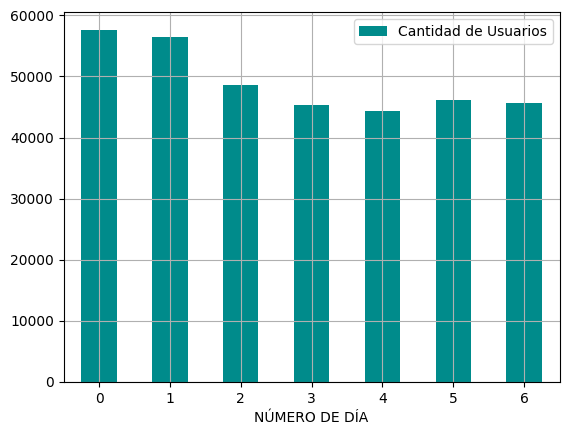

In [56]:
list=df_inst['order_dow'].unique()
list.sort()
list_values=[]
list_days=[]
for val in list:
    users=df_inst.query('order_dow==@val')['user_id'].unique()
    list_values.append(len(users))
    list_days.append(val)

data = {
    'order_dow': list_days,
    'users_cant': list_values
    }


df_users_day = pd.DataFrame(data)


print(df_users_day.sort_values(by='users_cant', ascending=False))
df_users_day.plot(kind='bar',
                x='order_dow',
                rot=0,
                y='users_cant',
                color='darkcyan',
                grid=True,
                xlabel='NÚMERO DE DÍA'
                   )
plt.legend().remove()
plt.legend(['Cantidad de Usuarios'])
plt.show()

Escribe aquí tus conclusiones
- El día domingo es el día que mas compran viveres, como mencionamos anteriormente hay que validar ids únicos para evitar resultados engañosos

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

1
30
   days_since_prior_order  order_id  user_id  order_number  order_dow  \
0                       1     20179    20179         20179      20179   
1                       2     27138    27138         27138      27138   
2                       3     30224    30224         30224      30224   
3                       4     31006    31006         31006      31006   
4                       5     30096    30096         30096      30096   

   order_hour_of_day  
0              20179  
1              27138  
2              30224  
3              31006  
4              30096  


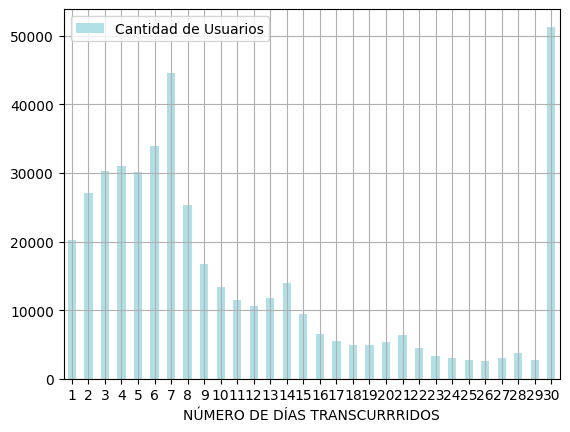

In [57]:
print(df_inst.query('days_since_prior_order>0')['days_since_prior_order'].min())
print(df_inst.query('days_since_prior_order>0')['days_since_prior_order'].max())
df_inst_wait=df_inst.query('days_since_prior_order>0').groupby('days_since_prior_order').count().reset_index()
print(df_inst_wait.head())

df_inst_wait.plot(kind='bar',
                x='days_since_prior_order',
                rot=0,
                y='user_id',
                color='powderblue',
                grid=True,
                xlabel='NÚMERO DE DÍAS TRANSCURRRIDOS'
                   )
plt.legend().remove()
plt.legend(['Cantidad de Usuarios'])
plt.show()

Escribe aquí tus conclusiones
- El mínimo es 1 día y el máximo 1 mes (30 días), recordamos aplicar el criterio diferente a 0

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [58]:
df_inst_1_m=df_inst.query('order_dow==3').groupby(['order_hour_of_day']).count().reset_index()
df_inst_1_s=df_inst.query('order_dow==6').groupby(['order_hour_of_day']).count().reset_index()
df_inst_1_m = df_inst_1_m.rename(columns={'order_id': 'wednesday'})
df_inst_1_s = df_inst_1_s.rename(columns={'order_id': 'saturday'})
df_inst_1_days=df_inst_1_m.merge(df_inst_1_s,on='order_hour_of_day',how='left')
df_inst_1_days=df_inst_1_days[['order_hour_of_day','wednesday','saturday']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   order_hour_of_day  24 non-null     int64
 1   wednesday          24 non-null     int64
 2   saturday           24 non-null     int64
dtypes: int64(3)
memory usage: 768.0 bytes
   order_hour_of_day  wednesday  saturday
0                  0        373       464
1                  1        215       254
2                  2        106       177
3                  3        101       125
4                  4        108       118


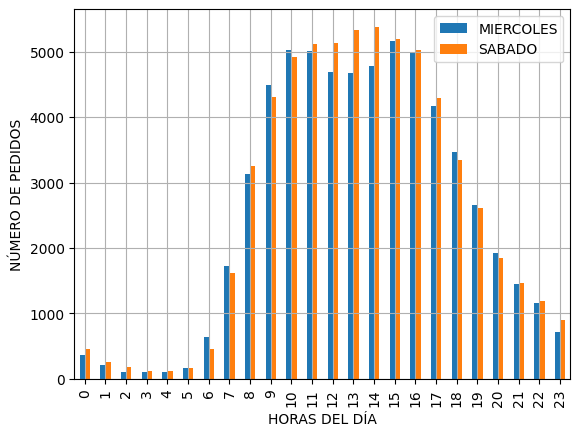

In [59]:
df_inst_1_days.info()
print(df_inst_1_days.head())

df_inst_1_days.plot(kind='bar',
        x='order_hour_of_day',
        xlabel='HORAS DEL DÍA',
        ylabel='NÚMERO DE PEDIDOS',
        grid=True,
        )
plt.legend(['MIERCOLES', 'SABADO'])
plt.show()

Escribe aquí tus conclusiones
- Se puede observar que a simple vista es muy poca la diferencia del día miércoles con el sábado en todas las horas del día

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [60]:
df_inst_2=df_inst.groupby('order_number').count().reset_index()
print(df_inst_2)

    order_number  order_id  user_id  order_dow  order_hour_of_day  \
0              1     28817    28817      28817              28817   
1              2     28633    28633      28633              28633   
2              3     28685    28685      28685              28685   
3              4     28703    28703      28703              28703   
4              5     25661    25661      25661              25661   
5              6     22821    22821      22821              22821   
6              7     20586    20586      20586              20586   
7              8     18556    18556      18556              18556   
8              9     16905    16905      16905              16905   
9             10     15524    15524      15524              15524   
10            11     14230    14230      14230              14230   
11            12     13103    13103      13103              13103   
12            13     12201    12201      12201              12201   
13            14     11435    1143

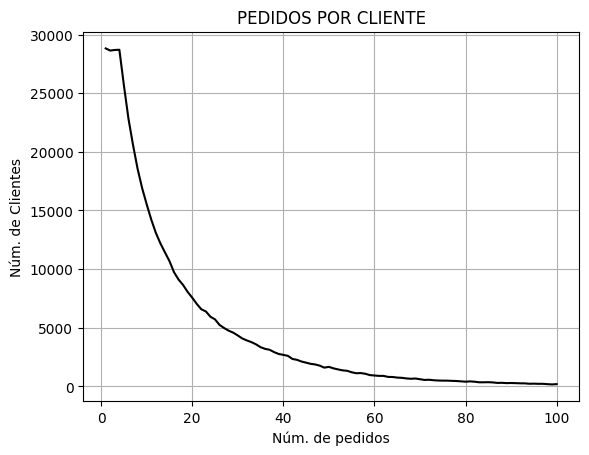

In [61]:
df_inst_2.plot(
        x='order_number',
        y='order_id',
        title='PEDIDOS POR CLIENTE',
        xlabel='Núm. de pedidos',
        ylabel='Núm. de Clientes',
        grid=True,
        color='black'
        )
plt.legend().remove()
plt.show()

Escribe aquí tus conclusiones
- Podemos observar que entre menos sea el número de pedidos son más clientes, a difencia que entre son más pedidos neos cantidad de usuarios la ha realizado, tiene un proporcionalidas aparentemente idéntica, menos cantidad de pedidos más usuarios, más cantidad de pedidos menos usuarios.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [62]:
#Obtenemos los 20 productos más vendidos
df_ord_1=df_ord.merge(df_prod,on='product_id', how='left')
df_ord_1=df_ord_1.groupby(['product_id','product_name']).count().reset_index()
df_ord_1.sort_values('order_id',inplace=True,ascending=False)
df_ord_1=df_ord_1[['product_name','order_id']]
df_ord_1=df_ord_1.iloc[:20]
print(df_ord_1)

                   product_name  order_id
22808                    Banana     66050
12025    Bag of Organic Bananas     53297
19370      Organic Strawberries     37039
20077      Organic Baby Spinach     33971
43271      Organic Hass Avocado     29773
43788           Organic Avocado     24689
43663               Large Lemon     21495
15364              Strawberries     20018
24047                     Limes     19690
25556        Organic Whole Milk     19600
25666       Organic Raspberries     19197
21025      Organic Yellow Onion     15898
22908            Organic Garlic     15292
41244          Organic Zucchini     14584
35996       Organic Blueberries     13879
45561            Cucumber Kirby     13675
25889        Organic Fuji Apple     12544
5375              Organic Lemon     12232
7543   Apple Honeycrisp Organic     11993
37301    Organic Grape Tomatoes     11781


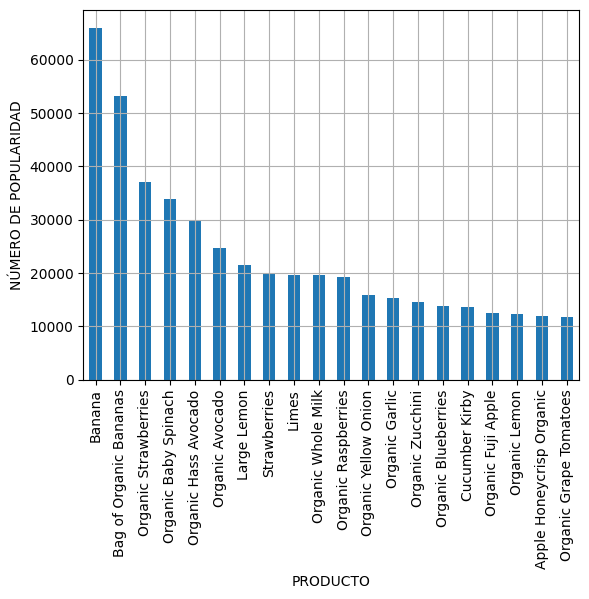

In [63]:
df_ord_1.plot(kind='bar',
        x='product_name',
        y='order_id',
        xlabel='PRODUCTO',
        ylabel='NÚMERO DE POPULARIDAD',
        grid=True,
        )
plt.legend().remove()
plt.show()

Escribe aquí tus conclusiones
- La Banana es el producto más popular, podemos ver que el producto top 20 es 5 veces menor al 1 a simple vista

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [67]:
#Podrias hacer el group by como te lo recomienda el revisar sobre el codigo
df_ord_3 = df_ord.groupby('order_id')['product_id'].count().reset_index()
print(df_ord_3.head())
#Acomodas el nombre de la columna para que no quede con el nombre del group by
df_ord_3.rename(columns={'product_id': 'num_products_per_order'}, inplace=True)
#Revsias que todo esté ok
print(df_ord_3.head())

   order_id  product_id
0         4          13
1         9          15
2        11           5
3        19           3
4        20           8
   order_id  num_products_per_order
0         4                      13
1         9                      15
2        11                       5
3        19                       3
4        20                       8
   order_id  num_products_per_order
0         4                      13
1         9                      15
2        11                       5
3        19                       3
4        20                       8


In [68]:
mean_products = df_ord_3['num_products_per_order'].mean()
print(f"Promedio de productos por pedido: {mean_products}")

Promedio de productos por pedido: 10.098983215049127


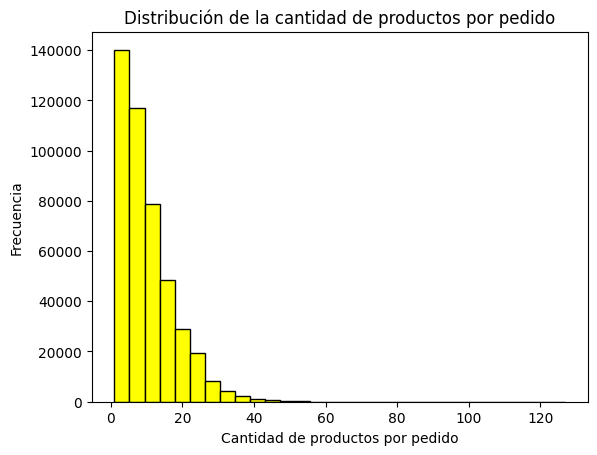

In [78]:
plt.hist(df_ord_3['num_products_per_order'], bins=30, edgecolor='k', color='yellow')
plt.title('Distribución de la cantidad de productos por pedido')
plt.xlabel('Cantidad de productos por pedido')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones
- Redondeando el promedio, son 10 productos los que compra un usuario por pedido

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [318]:
#Obtener pedidos que se han comprado más de una vez
df_inst_4=df_inst.merge(df_ord,on='order_id', how='left')
df_inst_4.drop(['order_dow','order_hour_of_day','add_to_cart_order','reordered'],axis='columns',inplace=True)
df_inst_4.info(show_counts=True)
#Convertir el id a entero
print(conversion_dato(df_inst_4, ['product_id'], 1))
df_inst_4[df_inst_4['product_id'].isnull()]
print(df_inst_4[df_inst_4['product_id'].isnull()].info())
df_inst_4.dropna(subset=['product_id'], inplace=True)
df_inst_4.info(show_counts=True)
print(conversion_dato(df_inst_4, ['product_id'], 1))
df_inst_4['product_id']=df_inst_4['product_id'].astype(int)
df_inst_4.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573913 entries, 0 to 4573912
Data columns (total 5 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                4573913 non-null  int64  
 1   user_id                 4573913 non-null  int64  
 2   order_number            4573913 non-null  int64  
 3   days_since_prior_order  4573913 non-null  int64  
 4   product_id              4545007 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 209.4 MB
{'Conversion': 'Entero', 'product_id': False}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28906 entries, 119 to 4573859
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                28906 non-null  int64  
 1   user_id                 28906 non-null  int64  
 2   order_number            28906 non-null  int64  
 3   days_since_prior_order 

In [319]:
df_inst_5=df_inst_4.merge(df_prod,on='product_id', how='left')
df_inst_5.head()
df_inst_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 8 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   days_since_prior_order  int64 
 4   product_id              int64 
 5   product_name            object
 6   aisle_id                int64 
 7   department_id           int64 
dtypes: int64(7), object(1)
memory usage: 312.1+ MB


In [320]:
df_inst_5=df_inst_5.query("order_number>1")
#print(df_inst_5.head())
df_inst_5=df_inst_5.groupby('product_id').count().reset_index()
#print(df_inst_5.head())
#print(df_inst_5.head())
#print(df_inst_5['product_name'].sum())
#df_inst_5.info()
df_inst_5=df_inst_5.merge(df_prod,on='product_id',how='left')
df_inst_5.drop(['order_id','user_id','order_number','days_since_prior_order','aisle_id_x','department_id_x','aisle_id_y','department_id_y'],axis='columns',inplace=True)
df_inst_5.head()

,product_id,product_name_x,product_name_y
0,1,261,Chocolate Sandwich Cookies
1,2,11,All-Seasons Salt
2,3,40,Robust Golden Unsweetened Oolong Tea
3,4,42,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,2,Pure Coconut Water With Orange


       product_id  product_name_x          product_name_y
22573       24852           61973                  Banana
11906       13176           50627  Bag of Organic Bananas
19177       21137           34789    Organic Strawberries
19874       21903           31824    Organic Baby Spinach
42804       47209           28197    Organic Hass Avocado
       product_id  product_name_x          product_name_y
22573       24852           61973                  Banana
11906       13176           50627  Bag of Organic Bananas
19177       21137           34789    Organic Strawberries
19874       21903           31824    Organic Baby Spinach
42804       47209           28197    Organic Hass Avocado


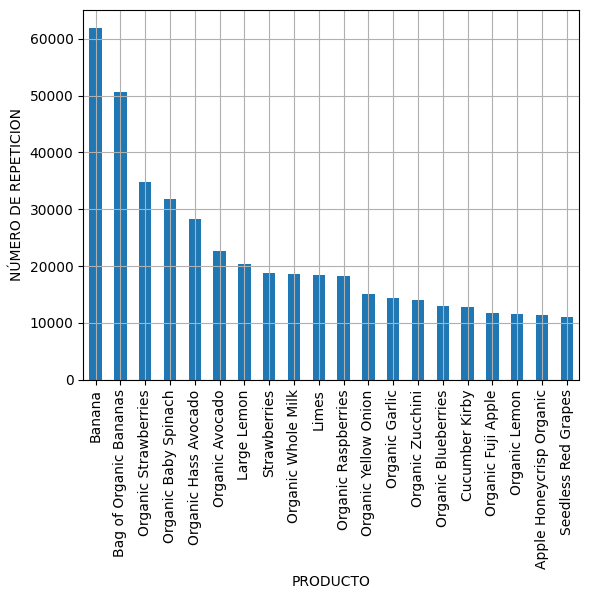

In [325]:
df_inst_6=df_inst_5.sort_values(by='product_name_x', ascending=False)
print(df_inst_6.head())
#df_inst_6=df_inst_6.drop(['product_id'],axis='columns').reset_index(drop=True)
df_inst_6=df_inst_6.iloc[:20]
print(df_inst_6.head())

df_inst_6.plot(kind='bar',
        x='product_name_y',
        y='product_name_x',
        xlabel='PRODUCTO',
        ylabel='NÚMERO DE REPETICION',
        grid=True,
        )
plt.legend().remove()

Escribe aquí tus conclusiones
- La banana es el producto que más vuelve a pedirse, y la gran mayoría de los tops son productos orgánicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [149]:
#df_inst_5.head()
df_inst_7=df_inst_5
print('Total de pedidos:',df_inst_7['product_name_x'].sum())
df_inst_7['proportion']=df_inst_7['product_name_x']*100/df_inst_7['product_name_x'].sum()
df_inst_7_1 = df_inst_7.drop(columns=['product_id','product_name_x'])
df_inst_7_1.sort_values(by='proportion',ascending=False, inplace=True)
print(df_inst_7_1['proportion'].sum())
print(df_inst_7_1.head())

Total de pedidos: 4253079
100.00000000000001
               product_name_y  proportion
22573                  Banana    1.457133
11906  Bag of Organic Bananas    1.190361
19177    Organic Strawberries    0.817972
19874    Organic Baby Spinach    0.748258
42804    Organic Hass Avocado    0.662979


Escribe aquí tus conclusiones
- Realizamos una comprobación de que la suma debe dar 100% de la proporción, el producto "Banana" es el que más se vuelve a pedir

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [150]:
#df_ord.info() #4545007
#Relacionar los datframes
df_prod_7=df_ord.merge(df_prod, on='product_id', how='left')
#print(df_prod_7.head())
#df_prod_7.info(show_counts=True)
df_prod_7=df_inst.merge(df_ord, on='order_id', how='left')
#AQUI TENGO DUDA PORQUE BORRA LAS COLUMNAS DEL DATAFRAME DF_PROD, SERAPORQUE ELID AL RECONOCERLO COMO FLTANTE NO COINCIDE?
print(df_prod_7.head())
#df_prod_7.info(show_counts=True)
df_prod_7.dropna(inplace=True)
#df_prod_7.info(show_counts=True)
#print(df_prod_7.head())
print(conversion_dato(df_prod_7, ['product_id','add_to_cart_order','reordered'], 1))
df_prod_7[['product_id','add_to_cart_order','reordered']] = df_prod_7[['product_id','add_to_cart_order','reordered']].astype(int)
#df_prod_7.info(show_counts=True)

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1515936   183418            11          6                 13   
2   1515936   183418            11          6                 13   
3   1515936   183418            11          6                 13   
4   1515936   183418            11          6                 13   

   days_since_prior_order  product_id  add_to_cart_order  reordered  
0                      30     19048.0                1.0        1.0  
1                      30     47766.0                3.0        1.0  
2                      30     45066.0                9.0        0.0  
3                      30     24082.0               11.0        0.0  
4                      30     24363.0                4.0        0.0  
{'Conversion': 'Entero', 'product_id': True, 'add_to_cart_order': True, 'reordered': True}


In [151]:
#Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
df_prod_8=df_prod_7.query('reordered>0')
#df_prod_8.info(show_counts=True)
df_prod_8=df_prod_8.merge(df_prod,on='product_id',how='left')
#df_prod_8.head()
#df_prod_8.info(show_counts=True)
df_prod_9=df_prod_8.groupby('product_name').count().reset_index()
df_prod_9.sort_values(by='product_id', ascending=False, inplace=True)
df_prod_9.drop(columns=['order_id','user_id','order_number','order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order','reordered','aisle_id','department_id'],inplace=True)
#df_prod_9.head()
df_prod_9['repeat']=df_prod_9['product_id']*100/df_inst_7['product_name_x'].sum()
#No dará 100% ya que no se contempla quienes solo han comprado 1 vez
print(df_prod_9['repeat'].sum())
df_prod_9.head()

63.10341284514113


,product_name,product_id,repeat
2506,Banana,55763,1.311121
2362,Bag of Organic Bananas,44450,1.045125
22964,Organic Strawberries,28639,0.673371
20476,Organic Baby Spinach,26233,0.616800
21637,Organic Hass Avocado,23629,0.555574


Escribe aquí tus conclusiones
- Al sumar el procentaje de repetición No dará 100% ya que no se contempla quienes solo han comprado 1 vez
- Podemos ver que la Banana es la que más se vuelve a pedir y posteriormente productor orgánicos

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [152]:
#df_ord.info()
df_ord_10=df_ord.merge(df_prod,on='product_id', how='left')
#df_ord_10.info()
df_ord_10=df_ord_10.query('add_to_cart_order==1')
df_ord_10=df_ord_10.groupby('product_name').count().reset_index()
df_ord_10.head()
df_ord_10.sort_values(by='add_to_cart_order',ascending=False, inplace=True)
df_ord_10.drop(columns=['order_id','product_id','reordered','aisle_id','department_id'],inplace=True)
df_ord_10.head(20)

,product_name,add_to_cart_order
1922,Banana,15562
1807,Bag of Organic Bananas,11026
17495,Organic Whole Milk,4363
17137,Organic Strawberries,3946
16063,Organic Hass Avocado,3390
15109,Organic Baby Spinach,3336
15087,Organic Avocado,3044
22726,Spring Water,2336
22968,Strawberries,2308
16757,Organic Raspberries,2024


Escribe aquí tus conclusiones
- La "Banana" sin duda es el producto TOP

### Conclusion general del proyecto:

En el transcurso de cada planteamiento con la práctica puedo concluir que:
- No alterar los dataframes originales
- Segmentar dataframes para ser reutilizados
- Comprobar al menos de una manera nuestro proceso
- Preprocesar los datos al crear dataframes
- Eliminar columnas inecesarias
- Reajustar los índices

Tener un diccionario de datos físico puede ayudar ya que:
- Establecemos las relaciones de los dataframes
- Anotamos la nomenclatura de los dataframe orifinales
- Anotamos la cantidad de datos una vez preprocesados

Podemos establecer y apoyarnos de nuestras funciones para se utilizadas en un futuro, y hacer más eficiente nuestro trabajo